retrieving "D:\projects\car-license-plate-recognition\doc\problem\placas\141002\Pa140028.jpg.pkz"


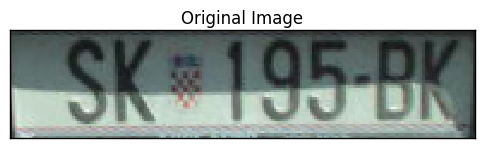

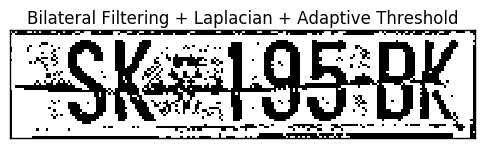

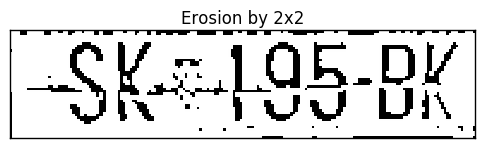

In [47]:
% matplotlib inline

import os
import cv2
import matplotlib.pyplot as plt
from plate import detect, segment, noise, roi, binarization
import numpy as np
import nms
import iou

# img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\141002\\Pa140022.jpg"
# img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\141002\\Pa140015.jpg"
img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\141002\\Pa140028.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# plate points retrieving
points = []
points_path = img_path + '.pkz'
if os.path.exists(points_path):
    points = roi.retrieve(points_path, decompress=False)
else:
    print(img_path, ' points file for plate not found')
    exit(1)

# plate segmentation
plates = segment.segment_plates(img, [points])
gray = cv2.cvtColor(plates[0], cv2.COLOR_RGB2GRAY)
h, w = gray.shape

# noise filtering
wsize = gray.shape[0]>>3
filtered = cv2.bilateralFilter(gray, wsize, 50, wsize)  # 30 - 50

plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.imshow(plates[0], interpolation='none')
plt.show()

# border enhancement
laplacian = cv2.Laplacian(filtered, cv2.CV_64F)
laplacian = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

# binarization
window_size = ((h>>1)<<1)+1
img_bin = cv2.adaptiveThreshold(laplacian, 255, cv2.THRESH_BINARY_INV, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, window_size, 0)
plt.imshow(img_bin, cmap = 'gray', interpolation='none')
plt.title('Bilateral Filtering + Laplacian + Adaptive Threshold'), plt.xticks([]), plt.yticks([])
plt.show()

# morphology
img_bin = cv2.dilate(img_bin, cv2.getStructuringElement(cv2.MORPH_ERODE, (2, 2)), iterations=1)
plt.title('Erosion by 2x2'), plt.xticks([]), plt.yticks([])
plt.imshow(img_bin, cmap='gray', interpolation='none')
plt.show()

# # binarized_inv = cv2.bitwise_not(binarized)
# # http://docs.opencv.org/master/d1/d32/tutorial_py_contour_properties.html
# image, contours, hierarchy = cv2.findContours(img_bin, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)
# bin_cnt = np.zeros(img_bin.shape, np.uint8)
# maxrect = [0, 0, w, h]
# for i, cnt in enumerate(contours):
#     rx, ry, rw, rh = cv2.boundingRect(cnt)
#     iou_ratio = iou.bb_intersection_over_union(maxrect, [rx, ry, rx + rw -1 , ry + rh - 1])
#     if iou_ratio > 0.005 and iou_ratio < 0.9:
#         cv2.drawContours(bin_cnt, contours, i, (255, 255, 255), cv2.FILLED, 8)
# #         cv2.rectangle(bin_cnt, (rx, ry), (rx+rw-1, ry+rh-1), 255, -1)
# bin_cnt = cv2.dilate(bin_cnt, cv2.getStructuringElement(cv2.MORPH_ERODE, (2, 2)), iterations=1)

# bk = cv2.bitwise_and(img_bin, img_bin, mask=bin_cnt)
# bg = cv2.bitwise_not(np.zeros(img_bin.shape, np.uint8))
# bg = cv2.bitwise_and(bg, bg, mask=cv2.bitwise_not(bin_cnt))
# img_masked = cv2.bitwise_or(bk, bg)
# img_masked = cv2.dilate(img_masked, cv2.getStructuringElement(cv2.MORPH_ERODE, (2, 2)), iterations=1)
# img_masked = cv2.erode(img_masked, cv2.getStructuringElement(cv2.MORPH_ERODE, (2, 2)), iterations=1)
# plt.title('Contours after iou & dilation/erosion'), plt.xticks([]), plt.yticks([])
# plt.imshow(img_masked, cmap='gray', interpolation='none')
# plt.show()


# image, contours, hierarchy = cv2.findContours(img_masked, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)
# bin_cnt = np.zeros(img_masked.shape, np.uint8)
# maxrect = [0, 0, w, h]
# for i, cnt in enumerate(contours):
#     rx, ry, rw, rh = cv2.boundingRect(cnt)
#     iou_ratio = iou.bb_intersection_over_union(maxrect, [rx, ry, rx + rw -1 , ry + rh - 1])
#     if iou_ratio > 0.005 and iou_ratio < 0.9:
#         cv2.rectangle(bin_cnt, (rx, ry), (rx+rw-1, ry+rh-1), 255, -1)
# #         cv2.drawContours(bin_cnt, contours, i, (255, 255, 255), cv2.FILLED, 8)
# bin_cnt = cv2.dilate(bin_cnt, cv2.getStructuringElement(cv2.MORPH_ERODE, (4, 4)), iterations=1)
# plt.title('#1 Contours after iou & dilation/erosion'), plt.xticks([]), plt.yticks([])
# plt.imshow(bin_cnt, cmap='gray', interpolation='none')
# plt.show()
        

# image, contours, hierarchy = cv2.findContours(bin_cnt, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)
# bin_cnt = np.zeros(img_masked.shape, np.uint8)
# maxrect = [0, 0, w, h]
# for i, cnt in enumerate(contours):
#     rx, ry, rw, rh = cv2.boundingRect(cnt)
#     iou_ratio = iou.bb_intersection_over_union(maxrect, [rx, ry, rx + rw -1 , ry + rh - 1])
#     if iou_ratio > 0.005 and iou_ratio < 0.9:
#         cv2.rectangle(bin_cnt, (rx, ry), (rx+rw-1, ry+rh-1), 255, -1)
# bin_cnt = cv2.dilate(bin_cnt, cv2.getStructuringElement(cv2.MORPH_ERODE, (4, 4)), iterations=1)
# plt.title('#2 Contours after iou & dilation/erosion'), plt.xticks([]), plt.yticks([])
# plt.imshow(bin_cnt, cmap='gray', interpolation='none')
# plt.show()

# bk = cv2.bitwise_and(img_bin, img_bin, mask=bin_cnt)
# bg = cv2.bitwise_not(np.zeros(img_bin.shape, np.uint8))
# bg = cv2.bitwise_and(bg, bg, mask=cv2.bitwise_not(bin_cnt))
# img_masked = cv2.bitwise_or(bk, bg)
# img_masked = cv2.dilate(img_masked, cv2.getStructuringElement(cv2.MORPH_ERODE, (2, 2)), iterations=1)
# img_masked = cv2.erode(img_masked, cv2.getStructuringElement(cv2.MORPH_ERODE, (2, 2)), iterations=1)
# plt.title('Final#1'), plt.xticks([]), plt.yticks([])
# plt.imshow(img_masked, cmap='gray', interpolation='none')
# plt.show()


# bk = cv2.bitwise_and(gray, gray, mask=bin_cnt)
# bg = cv2.bitwise_not(np.zeros(img_bin.shape, np.uint8))
# bg = cv2.bitwise_and(bg, bg, mask=cv2.bitwise_not(bin_cnt))
# img_masked = cv2.bitwise_or(bk, bg)
# img_masked = cv2.dilate(img_masked, cv2.getStructuringElement(cv2.MORPH_ERODE, (2, 2)), iterations=1)
# img_masked = cv2.erode(img_masked, cv2.getStructuringElement(cv2.MORPH_ERODE, (2, 2)), iterations=1)
# plt.title('Final#2'), plt.xticks([]), plt.yticks([])
# plt.imshow(img_masked, cmap='gray', interpolation='none')
# plt.show()

# bk = cv2.bitwise_and(filtered, filtered, mask=bin_cnt)
# bg = cv2.bitwise_not(np.zeros(img_bin.shape, np.uint8))
# bg = cv2.bitwise_and(bg, bg, mask=cv2.bitwise_not(bin_cnt))
# img_masked = cv2.bitwise_or(bk, bg)
# img_masked = cv2.dilate(img_masked, cv2.getStructuringElement(cv2.MORPH_ERODE, (2, 2)), iterations=1)
# img_masked = cv2.erode(img_masked, cv2.getStructuringElement(cv2.MORPH_ERODE, (2, 2)), iterations=1)
# plt.title('Final#3'), plt.xticks([]), plt.yticks([])
# plt.imshow(img_masked, cmap='gray', interpolation='none')
# plt.show()

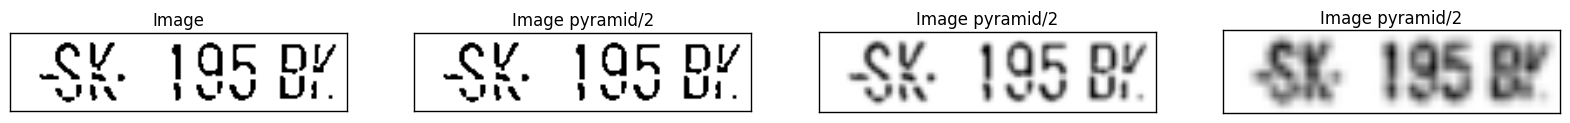

In [41]:
# generate Gaussian pyramid for A
G = img_masked.copy()
gpA = [G]
for i in range(3):
    G = cv2.pyrDown(G)
    gpA.append(G)

plt.figure(figsize=(20, 20))
plt.subplot(1, 4, 1), plt.imshow(img_masked, cmap='gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])
for i in range(3):
    plt.subplot(1, 4, i + 1 +1), plt.imshow(gpA[i], cmap='gray')
    plt.title('Image pyramid/2'), plt.xticks([]), plt.yticks([])

plt.show()

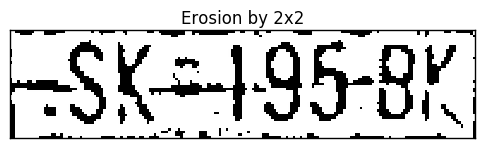

In [4]:
binarized = cv2.dilate(thresholded, cv2.getStructuringElement(cv2.MORPH_ERODE, (2, 2)), iterations=1)
plt.title('Erosion by 2x2'), plt.xticks([]), plt.yticks([])
plt.imshow(binarized, cmap='gray', interpolation='none')
plt.show()

# binarized = cv2.erode(binarized, cv2.getStructuringElement(cv2.MORPH_ERODE, (2, 2)), iterations=1)
# plt.title('Dilation by 2x2'), plt.xticks([]), plt.yticks([])
# plt.imshow(binarized, cmap='gray', interpolation='none')
# plt.show()

In [1]:
binarized_inv = cv2.bitwise_not(binarized)
# http://docs.opencv.org/master/d1/d32/tutorial_py_contour_properties.html
image, contours, hierarchy = cv2.findContours(binarized_inv, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)
bin_cnt = np.zeros(binarized.shape, np.uint8)
for i, cnt in enumerate(contours):
    rx, ry, rw, rh = cv2.boundingRect(cnt)
    cv2.rectangle(bin_cnt, (rx, ry), (rx + rw, ry + rh), 255)
    
plt.title('Contours'), plt.xticks([]), plt.yticks([])
plt.imshow(bin_cnt, cmap='gray', interpolation='none')
plt.show()

NameError: name 'cv2' is not defined

In [ ]:
# ASUMPTION: a license plate's letter will have at least the 1/2 of height

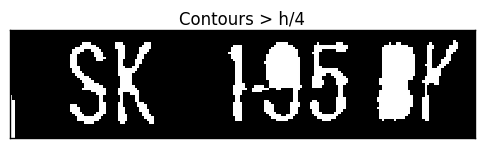

In [74]:
binarized_inv = cv2.bitwise_not(binarized)
# http://docs.opencv.org/master/d1/d32/tutorial_py_contour_properties.html
image, contours, hierarchy = cv2.findContours(binarized_inv, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)
bin_cnt = np.zeros(binarized.shape, np.uint8)
for i, cnt in enumerate(contours):
    rx, ry, rw, rh = cv2.boundingRect(cnt)
    if rh >= (h>>2):
#         cv2.rectangle(bin_cnt, (rx, ry), (rx + rw - 1, ry + rh - 1), 255, -1)
        cv2.drawContours(bin_cnt, contours, i, (255, 255, 255), cv2.FILLED, 8)
    
plt.title('Contours > h/4'), plt.xticks([]), plt.yticks([])
plt.imshow(bin_cnt, cmap='gray', interpolation='none')
plt.show()